In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50123 stdev: 0.06412
Best fitness: 0.75387 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.156
Mean genetic distance 2.889, standard deviation 0.484
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.993 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53905 stdev: 0.06829
Best fitness: 0.75387 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.180
Mean genetic distance 2.972, standard deviation 0.500
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.982 sec (21.988 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56084 stdev: 0.07712
Best fitness: 0.75387 - size: (2, 13) - species 22 - id 64
Average adjusted fitness: 0.229
Mean genetic distance 3.017, standard deviation 0.517
Population of 200 members in 29 species
Total extincti

Population's average fitness: 0.63752 stdev: 0.08586
Best fitness: 0.79654 - size: (4, 17) - species 23 - id 1494
Average adjusted fitness: 0.218
Mean genetic distance 3.301, standard deviation 0.514
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 45.125 sec (33.475 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64263 stdev: 0.08814
Best fitness: 0.79654 - size: (4, 17) - species 23 - id 1494
Average adjusted fitness: 0.290
Mean genetic distance 3.293, standard deviation 0.521
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 37.939 sec (34.843 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64079 stdev: 0.08822
Best fitness: 0.79654 - size: (4, 17) - species 23 - id 1494
Average adjusted fitness: 0.263
Mean genetic distance 3.344, standard deviation 0.538
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 38.191 sec (35.658 average)

 

Population's average fitness: 0.64239 stdev: 0.09499
Best fitness: 0.81694 - size: (5, 21) - species 23 - id 5473
Average adjusted fitness: 0.244
Mean genetic distance 3.317, standard deviation 0.609
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 41.838 sec (40.489 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63697 stdev: 0.09580
Best fitness: 0.81694 - size: (5, 21) - species 23 - id 5473
Average adjusted fitness: 0.231
Mean genetic distance 3.344, standard deviation 0.610
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 42.070 sec (40.705 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61925 stdev: 0.09528
Best fitness: 0.81694 - size: (5, 21) - species 23 - id 5473
Average adjusted fitness: 0.242
Mean genetic distance 3.416, standard deviation 0.617
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 41.013 sec (40.738 average)

 

Population's average fitness: 0.64585 stdev: 0.10441
Best fitness: 0.83364 - size: (9, 29) - species 58 - id 10814
Average adjusted fitness: 0.250
Mean genetic distance 3.279, standard deviation 0.590
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 50.545 sec (44.894 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64061 stdev: 0.10435
Best fitness: 0.83364 - size: (9, 29) - species 58 - id 10814
Average adjusted fitness: 0.251
Mean genetic distance 3.286, standard deviation 0.578
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 44.974 sec (45.083 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64125 stdev: 0.10682
Best fitness: 0.83364 - size: (9, 29) - species 58 - id 10814
Average adjusted fitness: 0.264
Mean genetic distance 3.266, standard deviation 0.579
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 50.017 sec (45.677 average)

Population's average fitness: 0.64757 stdev: 0.10972
Best fitness: 0.83612 - size: (10, 30) - species 58 - id 12608
Average adjusted fitness: 0.211
Mean genetic distance 3.170, standard deviation 0.597
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 38.504 sec (38.246 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65682 stdev: 0.10547
Best fitness: 0.83612 - size: (10, 30) - species 58 - id 12608
Average adjusted fitness: 0.249
Mean genetic distance 3.178, standard deviation 0.579
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 38.322 sec (38.322 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65853 stdev: 0.10937
Best fitness: 0.83612 - size: (10, 30) - species 58 - id 12608
Average adjusted fitness: 0.249
Mean genetic distance 3.144, standard deviation 0.585
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 39.732 sec (38.497 avera

Population's average fitness: 0.65853 stdev: 0.11073
Best fitness: 0.83612 - size: (9, 25) - species 49 - id 18092
Average adjusted fitness: 0.329
Mean genetic distance 3.223, standard deviation 0.619
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 38.982 sec (38.599 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.65762 stdev: 0.10555
Best fitness: 0.83612 - size: (9, 25) - species 49 - id 18092
Average adjusted fitness: 0.280
Mean genetic distance 3.190, standard deviation 0.633
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 40.651 sec (38.802 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.65884 stdev: 0.10656
Best fitness: 0.83612 - size: (9, 25) - species 49 - id 18092
Average adjusted fitness: 0.253
Mean genetic distance 3.209, standard deviation 0.627
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 39.645 sec (38.957 averag

Population's average fitness: 0.65536 stdev: 0.10985
Best fitness: 0.83612 - size: (9, 25) - species 49 - id 18092
Average adjusted fitness: 0.196
Mean genetic distance 3.134, standard deviation 0.583
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 45.920 sec (43.220 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.66211 stdev: 0.10661
Best fitness: 0.83612 - size: (9, 25) - species 49 - id 18092
Average adjusted fitness: 0.230
Mean genetic distance 3.143, standard deviation 0.583
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 45.070 sec (43.560 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65715 stdev: 0.10926
Best fitness: 0.83612 - size: (9, 25) - species 49 - id 18092
Average adjusted fitness: 0.289
Mean genetic distance 3.142, standard deviation 0.590
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 45.024 sec (43.818 averag

Population's average fitness: 0.65413 stdev: 0.12173
Best fitness: 0.82313 - size: (4, 15) - species 30 - id 1851
Average adjusted fitness: 0.355
Mean genetic distance 3.199, standard deviation 0.532
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 26.374 sec (26.065 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65128 stdev: 0.12745
Best fitness: 0.82313 - size: (4, 15) - species 30 - id 1851
Average adjusted fitness: 0.382
Mean genetic distance 3.225, standard deviation 0.538
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 25.701 sec (26.167 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64353 stdev: 0.12417
Best fitness: 0.82313 - size: (4, 15) - species 30 - id 1851
Average adjusted fitness: 0.347
Mean genetic distance 3.185, standard deviation 0.521
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 25.843 sec (26.109 average)

 

Population's average fitness: 0.64793 stdev: 0.13554
Best fitness: 0.83241 - size: (4, 16) - species 4 - id 5512
Average adjusted fitness: 0.350
Mean genetic distance 3.225, standard deviation 0.539
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 31.235 sec (29.891 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63415 stdev: 0.15260
Best fitness: 0.83241 - size: (4, 16) - species 4 - id 5512
Average adjusted fitness: 0.358
Mean genetic distance 3.195, standard deviation 0.545
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 30.268 sec (29.939 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63832 stdev: 0.15061
Best fitness: 0.83241 - size: (4, 16) - species 4 - id 5512
Average adjusted fitness: 0.343
Mean genetic distance 3.218, standard deviation 0.538
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 30.608 sec (30.089 average)

 ***

Population's average fitness: 0.65893 stdev: 0.14210
Best fitness: 0.85034 - size: (10, 30) - species 30 - id 10211
Average adjusted fitness: 0.379
Mean genetic distance 3.124, standard deviation 0.551
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 33.305 sec (33.525 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.66421 stdev: 0.14258
Best fitness: 0.85034 - size: (10, 30) - species 30 - id 10211
Average adjusted fitness: 0.371
Mean genetic distance 3.125, standard deviation 0.542
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 33.339 sec (33.712 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.66219 stdev: 0.13659
Best fitness: 0.85034 - size: (10, 30) - species 30 - id 10211
Average adjusted fitness: 0.365
Mean genetic distance 3.129, standard deviation 0.556
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 32.968 sec (33.786 avera

Population's average fitness: 0.66284 stdev: 0.16999
Best fitness: 0.85591 - size: (17, 44) - species 58 - id 14274
Average adjusted fitness: 0.382
Mean genetic distance 3.155, standard deviation 0.589
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 40.244 sec (37.811 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.66887 stdev: 0.16258
Best fitness: 0.85591 - size: (17, 44) - species 58 - id 14274
Average adjusted fitness: 0.386
Mean genetic distance 3.143, standard deviation 0.586
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 37.326 sec (37.940 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.69081 stdev: 0.15777
Best fitness: 0.85591 - size: (17, 44) - species 58 - id 14274
Average adjusted fitness: 0.401
Mean genetic distance 3.109, standard deviation 0.596
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 38.208 sec (38.061 avera

Population's average fitness: 0.68589 stdev: 0.16305
Best fitness: 0.86024 - size: (10, 30) - species 30 - id 15846
Average adjusted fitness: 0.516
Mean genetic distance 3.146, standard deviation 0.584
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 41.992 sec (40.951 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68506 stdev: 0.16198
Best fitness: 0.86024 - size: (10, 30) - species 30 - id 15846
Average adjusted fitness: 0.372
Mean genetic distance 3.119, standard deviation 0.589
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 41.519 sec (41.083 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.68902 stdev: 0.16364
Best fitness: 0.86024 - size: (10, 30) - species 30 - id 15846
Average adjusted fitness: 0.444
Mean genetic distance 3.099, standard deviation 0.578
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 42.391 sec (41.136 ave

Population's average fitness: 0.70883 stdev: 0.15208
Best fitness: 0.86395 - size: (18, 45) - species 64 - id 19216
Average adjusted fitness: 0.410
Mean genetic distance 2.937, standard deviation 0.571
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 46.202 sec (44.725 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.71284 stdev: 0.15944
Best fitness: 0.86395 - size: (18, 45) - species 64 - id 19216
Average adjusted fitness: 0.405
Mean genetic distance 2.920, standard deviation 0.568
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 45.852 sec (45.098 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.70870 stdev: 0.15667
Best fitness: 0.86395 - size: (18, 45) - species 64 - id 19216
Average adjusted fitness: 0.409
Mean genetic distance 2.945, standard deviation 0.553
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 44.965 sec (45.381 ave

Population's average fitness: 0.59289 stdev: 0.07800
Best fitness: 0.75510 - size: (4, 17) - species 30 - id 522
Average adjusted fitness: 0.152
Mean genetic distance 3.212, standard deviation 0.493
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 26.220 sec (25.351 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59459 stdev: 0.07966
Best fitness: 0.75510 - size: (4, 17) - species 30 - id 522
Average adjusted fitness: 0.228
Mean genetic distance 3.197, standard deviation 0.499
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 26.822 sec (25.723 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60539 stdev: 0.07526
Best fitness: 0.75510 - size: (4, 17) - species 30 - id 522
Average adjusted fitness: 0.191
Mean genetic distance 3.207, standard deviation 0.489
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 25.914 sec (25.906 average)

 ***

Population's average fitness: 0.61277 stdev: 0.07790
Best fitness: 0.77675 - size: (5, 18) - species 24 - id 2734
Average adjusted fitness: 0.164
Mean genetic distance 3.291, standard deviation 0.538
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 29.906 sec (30.351 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.60139 stdev: 0.08077
Best fitness: 0.77675 - size: (5, 18) - species 24 - id 2734
Average adjusted fitness: 0.205
Mean genetic distance 3.319, standard deviation 0.538
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 30.524 sec (30.603 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61626 stdev: 0.08003
Best fitness: 0.77675 - size: (5, 18) - species 24 - id 2734
Average adjusted fitness: 0.177
Mean genetic distance 3.339, standard deviation 0.520
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 30.945 sec (30.877 average)

 

Population's average fitness: 0.60344 stdev: 0.08972
Best fitness: 0.78726 - size: (13, 33) - species 14 - id 6332
Average adjusted fitness: 0.247
Mean genetic distance 3.411, standard deviation 0.575
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 33.893 sec (33.364 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.60690 stdev: 0.08587
Best fitness: 0.78726 - size: (13, 33) - species 14 - id 6332
Average adjusted fitness: 0.225
Mean genetic distance 3.384, standard deviation 0.573
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 33.999 sec (33.501 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.60528 stdev: 0.08365
Best fitness: 0.78726 - size: (13, 33) - species 14 - id 6332
Average adjusted fitness: 0.160
Mean genetic distance 3.374, standard deviation 0.564
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 34.719 sec (33.689 average)

Population's average fitness: 0.62382 stdev: 0.09993
Best fitness: 0.79963 - size: (15, 36) - species 14 - id 9353
Average adjusted fitness: 0.242
Mean genetic distance 3.316, standard deviation 0.607
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 38.968 sec (39.008 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.62603 stdev: 0.09948
Best fitness: 0.79963 - size: (15, 36) - species 14 - id 9353
Average adjusted fitness: 0.169
Mean genetic distance 3.307, standard deviation 0.614
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 39.476 sec (38.932 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.62314 stdev: 0.10802
Best fitness: 0.79963 - size: (15, 36) - species 14 - id 9353
Average adjusted fitness: 0.261
Mean genetic distance 3.307, standard deviation 0.629
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 39.627 sec (39.144 average)

Population's average fitness: 0.65424 stdev: 0.09761
Best fitness: 0.80334 - size: (15, 38) - species 14 - id 14035
Average adjusted fitness: 0.164
Mean genetic distance 3.269, standard deviation 0.664
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 45.486 sec (46.174 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.64849 stdev: 0.10164
Best fitness: 0.80334 - size: (15, 38) - species 14 - id 14035
Average adjusted fitness: 0.213
Mean genetic distance 3.272, standard deviation 0.655
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 45.132 sec (46.070 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.65742 stdev: 0.10378
Best fitness: 0.80334 - size: (15, 38) - species 14 - id 14035
Average adjusted fitness: 0.265
Mean genetic distance 3.265, standard deviation 0.674
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 46.186 sec (46.191 ave

Population's average fitness: 0.63829 stdev: 0.10480
Best fitness: 0.80767 - size: (16, 38) - species 51 - id 20962
Average adjusted fitness: 0.328
Mean genetic distance 3.175, standard deviation 0.572
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 51.628 sec (50.427 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.64078 stdev: 0.10239
Best fitness: 0.80767 - size: (16, 38) - species 51 - id 20962
Average adjusted fitness: 0.255
Mean genetic distance 3.169, standard deviation 0.581
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 52.284 sec (50.646 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.64616 stdev: 0.10072
Best fitness: 0.80767 - size: (16, 38) - species 51 - id 20962
Average adjusted fitness: 0.186
Mean genetic distance 3.182, standard deviation 0.587
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 50.351 sec (50.796 ave

Population's average fitness: 0.60408 stdev: 0.07403
Best fitness: 0.74026 - size: (4, 20) - species 19 - id 918
Average adjusted fitness: 0.235
Mean genetic distance 3.033, standard deviation 0.483
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 26.616 sec (24.392 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60872 stdev: 0.07656
Best fitness: 0.74150 - size: (4, 17) - species 3 - id 1242
Average adjusted fitness: 0.207
Mean genetic distance 3.075, standard deviation 0.481
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 26.464 sec (24.651 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60181 stdev: 0.07978
Best fitness: 0.74150 - size: (4, 17) - species 3 - id 1242
Average adjusted fitness: 0.246
Mean genetic distance 3.153, standard deviation 0.486
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 26.666 sec (24.875 average)

 *****

Population's average fitness: 0.62484 stdev: 0.08692
Best fitness: 0.75448 - size: (5, 18) - species 3 - id 3247
Average adjusted fitness: 0.230
Mean genetic distance 3.164, standard deviation 0.529
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 30.160 sec (30.033 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62795 stdev: 0.08464
Best fitness: 0.75448 - size: (5, 18) - species 3 - id 3247
Average adjusted fitness: 0.229
Mean genetic distance 3.147, standard deviation 0.545
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 29.675 sec (30.243 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62452 stdev: 0.08969
Best fitness: 0.75448 - size: (5, 18) - species 3 - id 3247
Average adjusted fitness: 0.251
Mean genetic distance 3.150, standard deviation 0.552
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 30.080 sec (30.312 average)

 ***

Population's average fitness: 0.62752 stdev: 0.08706
Best fitness: 0.77304 - size: (7, 23) - species 2 - id 6927
Average adjusted fitness: 0.291
Mean genetic distance 3.146, standard deviation 0.553
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 33.629 sec (33.637 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63476 stdev: 0.08351
Best fitness: 0.77304 - size: (7, 23) - species 2 - id 6927
Average adjusted fitness: 0.252
Mean genetic distance 3.177, standard deviation 0.562
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 35.596 sec (33.908 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62934 stdev: 0.09128
Best fitness: 0.77304 - size: (7, 23) - species 2 - id 6927
Average adjusted fitness: 0.269
Mean genetic distance 3.177, standard deviation 0.577
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 34.867 sec (34.028 average)

 ***

Population's average fitness: 0.62707 stdev: 0.09993
Best fitness: 0.78850 - size: (10, 30) - species 2 - id 11566
Average adjusted fitness: 0.251
Mean genetic distance 2.982, standard deviation 0.586
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 33.337 sec (35.304 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.64665 stdev: 0.08845
Best fitness: 0.78850 - size: (10, 30) - species 2 - id 11566
Average adjusted fitness: 0.245
Mean genetic distance 2.990, standard deviation 0.557
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 34.641 sec (35.082 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.64161 stdev: 0.09246
Best fitness: 0.78850 - size: (10, 30) - species 2 - id 11566
Average adjusted fitness: 0.281
Mean genetic distance 3.002, standard deviation 0.563
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 36.083 sec (35.159 average)

Population's average fitness: 0.63634 stdev: 0.09912
Best fitness: 0.79097 - size: (9, 28) - species 2 - id 12947
Average adjusted fitness: 0.248
Mean genetic distance 3.107, standard deviation 0.561
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 38.875 sec (38.442 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.63548 stdev: 0.10343
Best fitness: 0.79097 - size: (9, 28) - species 2 - id 12947
Average adjusted fitness: 0.239
Mean genetic distance 3.100, standard deviation 0.582
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 37.940 sec (38.677 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.63846 stdev: 0.09740
Best fitness: 0.79097 - size: (9, 28) - species 2 - id 12947
Average adjusted fitness: 0.268
Mean genetic distance 3.058, standard deviation 0.591
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 39.226 sec (38.952 average)


Population's average fitness: 0.64255 stdev: 0.08904
Best fitness: 0.79097 - size: (9, 28) - species 2 - id 12947
Average adjusted fitness: 0.240
Mean genetic distance 3.031, standard deviation 0.609
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 38.256 sec (37.594 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.63759 stdev: 0.08547
Best fitness: 0.79097 - size: (9, 28) - species 2 - id 12947
Average adjusted fitness: 0.238
Mean genetic distance 3.007, standard deviation 0.610
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.972 sec (37.469 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.63586 stdev: 0.09440
Best fitness: 0.79097 - size: (9, 28) - species 2 - id 12947
Average adjusted fitness: 0.281
Mean genetic distance 3.089, standard deviation 0.619
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.344 sec (37.344 average)


In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5166666666666667

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[10  1  2  1  0  0  0  0  0  1]
 [ 3  3  0  1  1  0  1  0  0  0]
 [ 3  0 11  1  0  0  0  0  0  3]
 [ 0  4  0  7  0  0  1  4  6  0]
 [ 0  8  0  0 16  0  0  1  3  4]
 [ 0  0  0  2  0  8  1  0  0  0]
 [ 0  0  0  1  0  7 15  0  0  0]
 [ 0  2  4  4  0  0  0 14  8  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  3  3  0  0  0  9]]


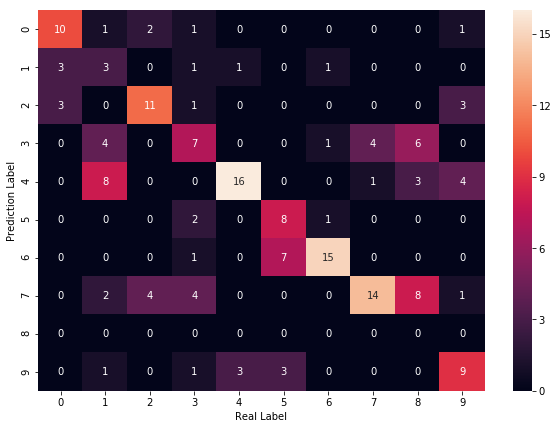

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5 6] real:5
#1 min_error:0 index:[0] real:2
#2 min_error:0 index:[3] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 3 4] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[7] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[3] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:0 index:[4] real:4
#12 min_error:1 index:[5 6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:1 index:[1 3 4] real:1
#15 min_error:0 index:[7] real:3
#16 min_error:0 index:[4] real:9
#17 min_error:0 index:[3] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[3] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[7] real:3
#23 min_error:0 index:[3] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[1] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[1 3 4] real:6
#29 min_error:0 index:[0] real:9
#30 

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5330859616573902
Avg Base Learner:0.8273036487322202


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.35555555555555557


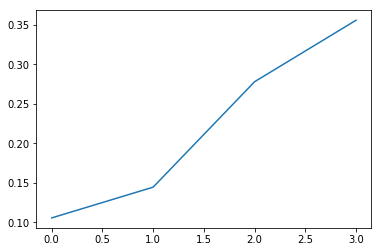

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.10555555555555556,
 0.14444444444444443,
 0.2777777777777778,
 0.35555555555555557]